# Deriving the area of a circle with unit radius without knowing value of 'pi'

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [9]:
# Number of darts to throw
N = 100000

In [10]:
## Create a square centered at (0,0) with edge length = 2 units
dots_x = [np.random.rand()*2-1 for x in range(N)]
dots_y = [np.random.rand()*2-1 for x in range(N)]

## Let's throw darts randomly at square board and see how many land inside the circle

<IPython.core.display.Javascript object>


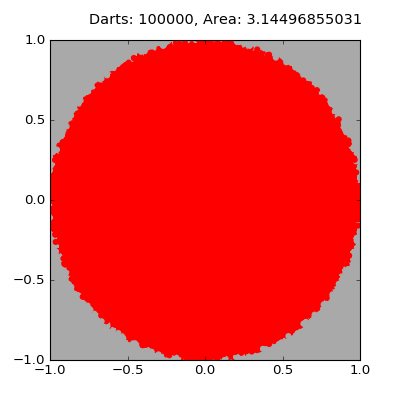

In [11]:
def dist(x,y):
    return np.sqrt(x*x+y*y)

def col(x,y):
    col = 'red'
    if (dist(x,y)>=1):
        col = 'darkgrey'
    return col

class LivePlotNotebook(object):
    
    def __init__(self):
        %matplotlib notebook
        fig,ax = plt.subplots(1,1,figsize=(5,5))
        ax.set_xlim([-1,1])
        ax.set_ylim([-1,1])
        self.ax = ax
        self.fig = fig
        self.ann = self.ax.annotate('', (-0.75,1), textcoords='data', size=13)

        self.num_cdots = 0

    def update(self, x, y, n):
        dot_col = [col(x1,y1) for x1,y1 in zip(x,y)]
        self.num_cdots += len([c for c in dot_col if c=='red'])
        self.ax.scatter(x,y,color=dot_col)
        title = 4*1.0*self.num_cdots/(i+1)
        self.ann.set_text('Darts: ' + str(n) + ', Area: ' + str(title) + '\n')
        self.fig.canvas.draw()
        
# Test
import time
liveplot = LivePlotNotebook()
NUM_ITERS = 20
BATCH_SIZE = N/NUM_ITERS
for i in range(N+1):
    if ((i>=BATCH_SIZE) & (i%BATCH_SIZE==0)):
        liveplot.update(x=dots_x[(i-BATCH_SIZE):i], y=dots_y[(i-BATCH_SIZE):i], n=i)
